# Ride Hailing Service: Modelling
### Benjamen Simon

The goal of this document is to model the given data using a logistic regression. In this case the logistic regression will not be used to classify but instead to estimate the probability that a given price point will be accepted. My exploratory data analysis identified that there is a strong sigmoid relationship between the Pay and the acceptance.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Load the data

In [2]:
data = pd.read_csv('Data/driverAcceptanceData.csv', names = ['ID', 'PAY', 'ACCEPTED'], header = 0)
data['ID'] = data['ID'].astype('category')
data = data.sort_values(by=['PAY', 'ACCEPTED'], ascending=True)

print(data)

      ID        PAY  ACCEPTED
62    62   0.000000         0
176  176   0.000000         0
477  477   0.000000         0
700  700   0.000000         0
780  780   0.000000         0
..   ...        ...       ...
12    12  50.576760         1
867  867  51.939040         1
26    26  52.194853         1
519  519  53.566190         1
227  227  53.667563         1

[1000 rows x 3 columns]


## Logistic Regression

### Process Data

In [14]:
x = np.array(data['PAY']).reshape(-1, 1)
y = np.array(data['ACCEPTED'])

### Fit the model

In [47]:
model = LogisticRegression()

model.fit(x, y)

print(model.intercept_)
print(model.coef_)

[-6.31420437]
[[0.25379972]]


### Extract the probabilities

In [65]:
possible_pay = np.arange(0, 60.01, 0.01).reshape(-1, 1)

pay_probs = model.predict_proba(possible_pay)

acceptance_probs = pay_probs[:, 1]

acceptance_probs

array([0.00180713, 0.00181172, 0.00181631, ..., 0.99986481, 0.99986515,
       0.9998655 ])

### Plot the relationship

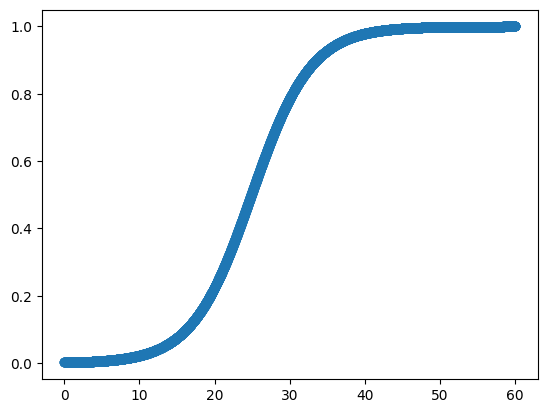

In [67]:
plt.scatter(
    x=np.arange(0, 60.01, 0.01),
    y=acceptance_probs,
)

### Record the results

In [77]:
results = {'PAY': np.round(np.arange(0, 60.01, 0.01), 2),
           'PROB': acceptance_probs}

results_df = pd.DataFrame(results)

results_df

,PAY,PROB
0,0.00,0.001807
1,0.01,0.001812
2,0.02,0.001816
3,0.03,0.001821
4,0.04,0.001826
...,...,...
5996,59.96,0.999864
5997,59.97,0.999864
5998,59.98,0.999865
5999,59.99,0.999865


### Save the results

In [78]:
results_df.to_csv('Data/probs.csv')